In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

import sketchnet as sn
from data_layer import DataLayer, load_pretrained_model

FLAGS = {}
FLAGS['data_path'] = 'dataset/dataset_with_order_info_256.mat'
FLAGS['model_path'] = 'dataset/model_with_order_info_256.mat'
FLAGS['batch_size'] = 2
# Instantiate the data layer to have easy access of the dataset
dataset = DataLayer(FLAGS['data_path'], batch_size=FLAGS['batch_size'])
dataset.train_cursor = 5364
# Load the pretrained models
pretrained = load_pretrained_model(FLAGS['model_path'] if FLAGS['model_path'] else None)

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the dataset...
Dataset loaded!
Pretrained Model Loaded!


In [2]:
def visualize(activation, r, c):
    """Gets a numpy array of shape from the relu layer and it visualizes it.
    """
    N, W, H, F = activation.shape
    print F
    for f in range(F):
        act_f = activation[0, :, :, f]
        max_val = np.max(act_f)
        if max_val > 255.0:
            act_f /= max_val
        plt.subplot(r, c, f + 1)
        plt.imshow(act_f, cmap='gray')

        plt.axis('off')
    plt.show()

In [3]:
with tf.Graph().as_default():
    images_placeholder = tf.placeholder(tf.float32, name='images_pl')
    labels_placeholder = tf.placeholder(tf.float32, name='labels_pl')
    dr_placeholder = tf.placeholder_with_default(1.0, shape=(), name='dr_pl')
    
    logits, activations = sn.inference(images_placeholder, dr_placeholder, pretrained=pretrained, visualize=True)
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        images, _ = dataset.next_batch_train()
        ops = [logits]
        for layer in sorted(activations):
            ops.append(activations[layer])
        rets = sess.run(ops, feed_dict={ images_placeholder: images })

In [4]:
for i in range(7):
    print rets[i+1].shape

(2, 71, 71, 64)
(2, 31, 31, 128)
(2, 15, 15, 256)
(2, 15, 15, 256)
(2, 15, 15, 256)
(2, 1, 1, 512)
(2, 1, 1, 512)


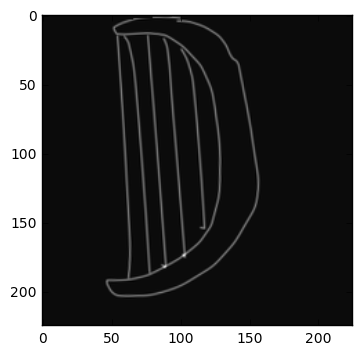

In [5]:
plt.imshow(images[0, :, :, 5], cmap='gray')
plt.show()

In [6]:
np.argmax(rets[0][0])

99

64


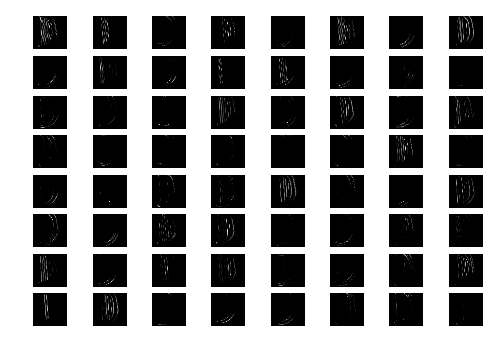

In [7]:
visualize(rets[1], 8, 8)

128


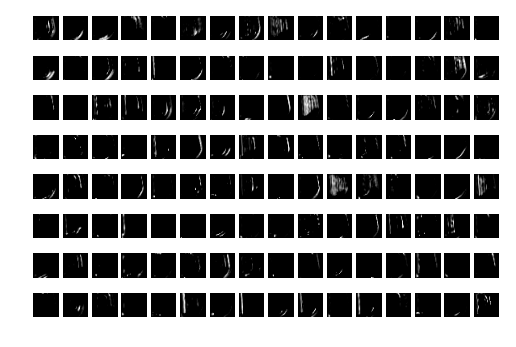

In [8]:
visualize(rets[2], 8, 16)

256


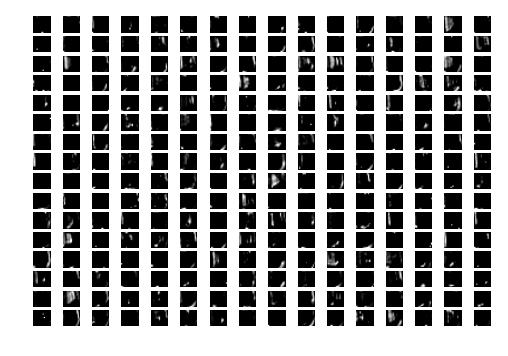

In [9]:
visualize(rets[3], 16, 16)

256


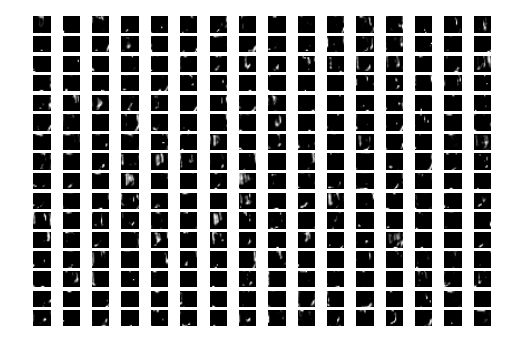

In [10]:
visualize(rets[4], 16, 16)

256


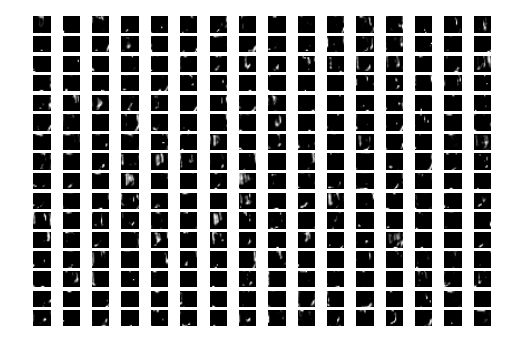

In [11]:
visualize(rets[4], 16, 16)

256


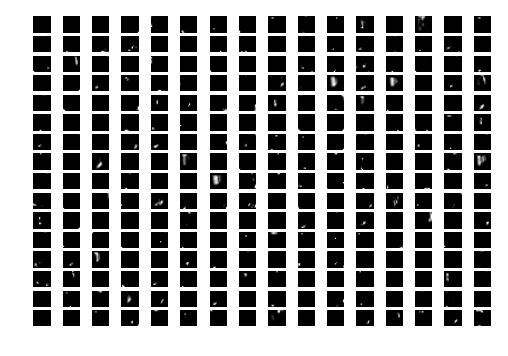

In [12]:
visualize(rets[5], 16, 16)

512


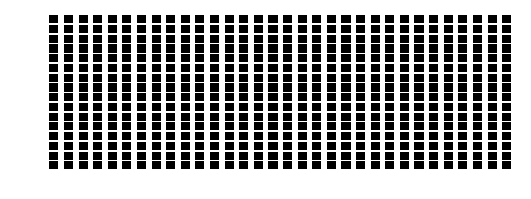

In [13]:
visualize(rets[6], 32, 32)

512


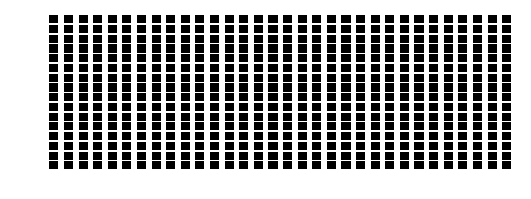

In [14]:
visualize(rets[7], 32, 32)

399


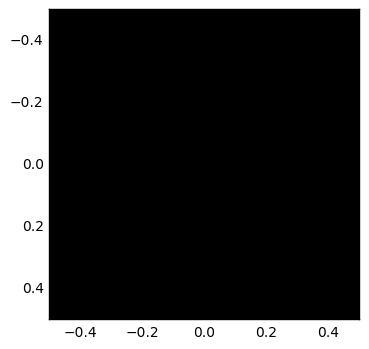

In [32]:
print np.sum(rets[7][0].reshape(-1) == 0)
plt.imshow(rets[7][0][:,:,7], cmap='gray')
plt.show()